<a href="https://colab.research.google.com/github/DavidZagin/IS_4487_Tokyo/blob/main/Copy_of_day3_lab_retailer_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3 Lab, IS 4487

Outline

Repeat exercises from Lab 2, for practice, but with the *SuperStore Retail Orders* dataset

- Loading installed packages
- Inspect data
- Clean data
- Summarize data
- Explore plot types and search for insights

Please use the Gemini AI tool to get coding ideas.



# Notebook Instructions
- Remember to save a copy of the notebook in Drive so that you can save your changes.
- Complete the Assignment Tasks.
- When you are done revising this notebook save your changes to GitHub and upload the URL for the file to Canvas for the assignment.
- Some of these assignments ask you to do things we have not covered yet.  Use AI to come up with a solution.

# Load Libraries

➡️ Assignment Tasks
- Load Pandas

In [2]:
# your code goes here
import pandas as pd
import matplotlib as mpl
import sklearn as sl


# Load Data

In [72]:
ss = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/main/Labs/DataSets/superstore_retail_orders.csv")

# Summarize and Review Data

➡️ Assignment Tasks

- Describe or profile the dataframe

In [73]:
# Your code goes here
ss.describe()


,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


In [74]:
ss.tail(10)

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price
56035,74083,2022-06-29,2022-06,Alex Murphy,South William,MISSOURI,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62
56036,74032,2022-06-29,2022-06,Ashlee Tang,Lake Robin,HAWAII,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62
56037,74063,2022-06-29,2022-06,Carmen Raman,Bellshire,NEVADA,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62
56038,74074,2022-06-29,2022-06,Carol Xu,Erichaven,NEW HAMPSHIRE,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62
56039,74055,NaN,NaN,Francis Ortega,Port Cynthiatown,WASHINGTON,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62
56040,74084,2022-06-29,2022-06,Ian Rogers,Port Mark,ALABAMA,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62
56041,74062,2022-06-29,2022-06,Marcus Anderson,West Aprilfurt,NEBRASKA,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62
56042,74065,2022-06-29,2022-06,Nathaniel Howard,New Lindaview,ILLINOIS,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62
56043,74038,2022-06-29,2022-06,Robin Sanz,West Frankhaven,ARKANSAS,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62
56044,74110,2022-06-30,2022-06,Mallory Jimenez,Dillonhaven,MARYLAND,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62


In [75]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


# Prepare Data

➡️ Assignment Tasks
- Remove rows with empty (NULL) values
- Locate outliers in any of the variables.   Filter them out if they appear to be mistakes; keep them if they are exceptional cases.
- Create a new field: total_purchase. This should be product_price x quantity.

In [76]:
# Drop NAs
ss_clean = ss.dropna()

In [90]:
# Search for and filter outliers
ss_clean= ss_clean[ss_clean['product_price']<200000]
ss_clean= ss_clean[ss_clean['quantity']<100000]

In [91]:
# create total_purchase
ss_clean['total_purchase']=ss_clean['product_price']*ss_clean['quantity']

Check that your cleaning worked

In [45]:
# your code goes here
ss_clean.describe()

,order_id,quantity,product_price,total_purchase
count,54173.000000,54173.000000,54173.000000,5.417300e+04
mean,61642.138224,1.553025,614.109579,7.973136e+02
std,7518.845903,9.284931,816.673965,1.412708e+04
min,45079.000000,1.000000,2.290000,2.290000e+00
25%,55623.000000,1.000000,7.950000,1.497000e+01
50%,61855.000000,1.000000,475.600000,4.756000e+02
75%,68063.000000,2.000000,914.620000,1.000440e+03
max,74147.000000,2000.000000,3578.270000,2.024994e+06


# Summarize Data

➡️ Assignment Tasks
- Calculate the average price per year-month
- Calculate the total revenue per year month

Does more cleaning need to be done? If so, do it and then recreate the above summary tables.

In [94]:
# average price
ss_clean.groupby(['order_year_month'])['product_price'].mean()

order_year_month
2020-01    3172.420978
2020-02    3199.469359
2020-03    3242.035279
2020-04    3194.646275
2020-05    3192.571359
2020-06    3132.275911
2020-07    1959.974251
2020-08    1924.981087
2020-09    1764.130833
2020-10    1800.830762
2020-11    1666.368901
2020-12    1729.697795
2021-01    1774.621612
2021-02    1755.272269
2021-03    1760.495962
2021-04    1691.161107
2021-05    1640.100368
2021-06    1694.477581
2021-07     729.851550
2021-08     409.107649
2021-09     437.462140
2021-10     434.127245
2021-11     468.310875
2021-12     500.330821
2022-01     469.658801
2022-02     481.718170
2022-03     485.362163
2022-04     482.481023
2022-05     513.701953
2022-06     509.168107
Name: product_price, dtype: float64

In [83]:
ss_clean['order_year_month'].unique()

array(['2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2029-07', '1922-06', '2421-09', '2029-06', '2029-08', '2020-08',
       '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02',
       '2021-03', '2021-04', '2021-05', '2021-06', '2020-07', '2020-01',
       '2020-02', '2020-03', '2020-04', '2020-05', '2020-06'],
      dtype=object)

In [84]:
ss_clean['year'] = ss_clean['order_year_month'].str[:4]


In [85]:
ss_clean['year'] = ss_clean['year'].astype(int)

ss_clean = ss_clean[ss_clean['year']<2024]
ss_clean = ss_clean[ss_clean['year']>2019]


In [55]:
ss_clean.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,total_purchase,year
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,1949.97,True
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,2599.96,True
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,3249.95,True
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99,True
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99,True


In [87]:
# total revenue
ss_clean['revenue'] = ss_clean['product_price'] * ss_clean['quantity']


# Plot Data

➡️ Assignment Tasks
- Produce two plots that show patterns or relationships in the data.
- Interpret these patterns for potential value to the business.  

In [66]:
#line for order date - most popular month/day for every nuber of orders
ss_clean= ['year'].astype(int)

AttributeError: 'list' object has no attribute 'astype'

In [70]:
# Your code goes here.  Plot 1
ss_clean['order_date'] = pd.to_datetime(ss_clean['order_date'])

TypeError: list indices must be integers or slices, not str

In [ ]:
# Your code goes here.  Plot 2

<Axes: xlabel='city'>

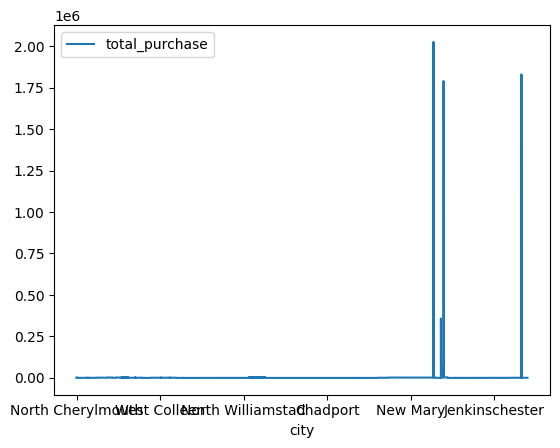

In [95]:
ss_clean.plot(kind = "line", x = "city", y = "total_purchase")

<Axes: xlabel='order_date'>

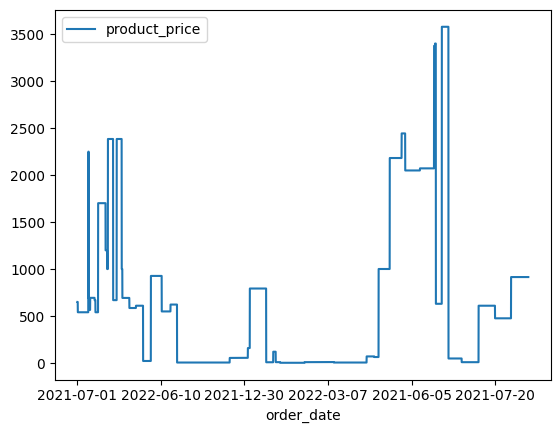

In [93]:
ss_clean.plot(kind = "line", x = "order_date", y = "product_price")

Make an interpretive comment.- based on the order dates and the city of where the most products where bought, we can interperate where the highest number of sales happened along with their dates.